# Author: Swayam Mayankkumar Patel


# Task 1: Data Preparation and Analysis


## Task 1.1


In [69]:
# Start from here to write your code for Task 1. Please also feel free to add more cells in this ipynb file. 
import pandas as pd
import numpy as np


# Load the CSV data from the original file
data = pd.read_csv('A2data.csv' , sep=';')

In [70]:
data.dropna(inplace=True)

In [71]:
# Removing duplicates
data = data.drop_duplicates()

In [72]:
# Remove rows with missing values and create a random sample of 600 instances
random_sample = data.dropna().sample(n=600, random_state=42)

# Save the random sample to a new CSV file
random_sample.to_csv('A2RandomSample.csv', index=False)


In [73]:
# Load the data from A2RandomSample.csv into a DataFrame
df = pd.read_csv("A2RandomSample.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.8,0.29,0.05,0.8,0.038,11.0,30,0.9924,3.36,0.35,9.2,5
1,7.2,0.23,0.38,14.3,0.058,55.0,194,0.9979,3.09,0.44,9.0,6
2,6.7,0.26,0.30,1.8,0.043,25.0,121,0.9944,3.44,0.61,10.2,6
3,7.1,0.26,0.49,2.2,0.032,31.0,113,0.9903,3.37,0.42,12.9,9
4,8.3,0.36,0.57,15,0.052,35.0,256,1.0001,2.93,0.64,8.6,5


In [75]:
random_sample.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar           object
chlorides               float64
free sulfur dioxide      object
total sulfur dioxide     object
density                  object
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [76]:
# Performing data type conversion
# Convert specific columns to float
df['residual sugar'] = pd.to_numeric(df['residual sugar'], errors='coerce')
df['free sulfur dioxide'] = pd.to_numeric(df['free sulfur dioxide'], errors='coerce')
df['total sulfur dioxide'] = pd.to_numeric(df['total sulfur dioxide'], errors='coerce')
df['density'] = pd.to_numeric(df['density'], errors='coerce')
df['quality'] = pd.to_numeric(df['quality'], errors='coerce')

# Check the updated data types
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


## Task 1.2


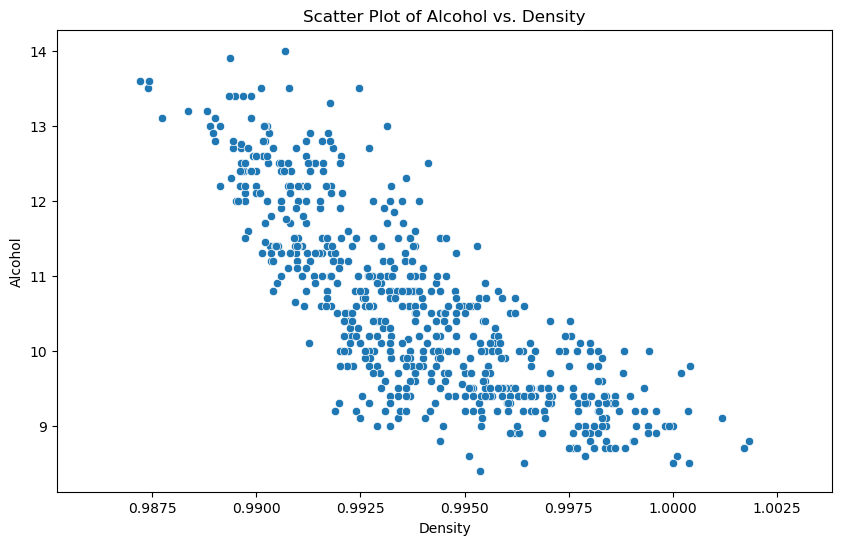

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

df['density'] = pd.to_numeric(df['density'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='alcohol', data=df)
plt.title('Scatter Plot of Alcohol vs. Density')
plt.xlabel('Density')
plt.ylabel('Alcohol')

# Set custom x-axis limits to provide space between values
x_min = df['density'].min() - 0.002  
x_max = df['density'].max() + 0.002  
plt.xlim(x_min, x_max)

plt.show()


In [46]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer  


imputer = SimpleImputer(strategy='mean')
df['density'] = imputer.fit_transform(df['density'].values.reshape(-1, 1))
df['alcohol'] = imputer.fit_transform(df['alcohol'].values.reshape(-1, 1))

# Prepare the data
X = df['density'].values.reshape(-1, 1)  
y = df['alcohol'].values  

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Interpret the coefficients of the model
intercept = model.intercept_
slope = model.coef_[0]

# Print the coefficients
print(f"Intercept: {intercept}")
print(f"Slope (Coefficient for 'density'): {slope}")


Intercept: 330.9998020531018
Slope (Coefficient for 'density'): -322.39066811681374


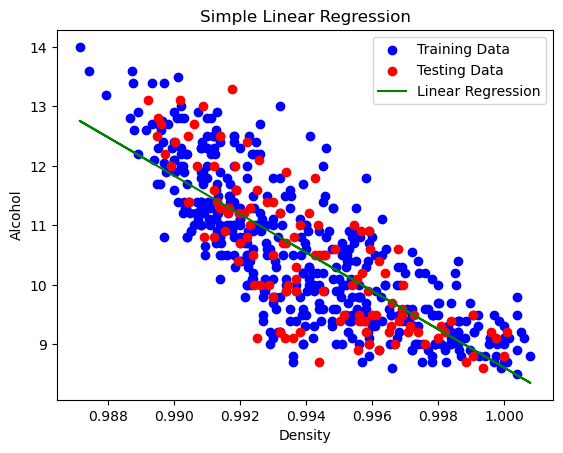

In [47]:
# Visualize the linear regression line (optional)
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.scatter(X_test, y_test, label='Testing Data', color='red')
plt.plot(X_train, model.predict(X_train), label='Linear Regression', color='green')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

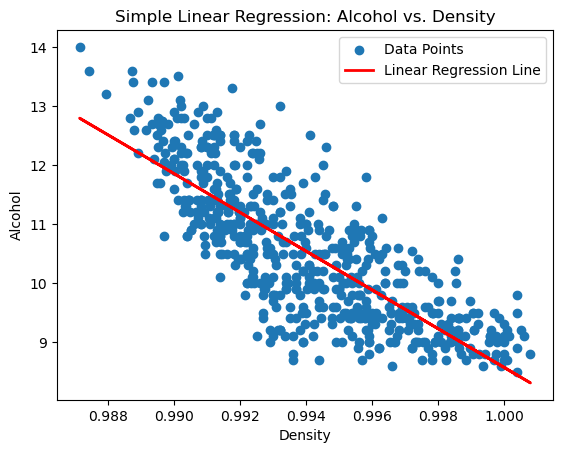

In [48]:
# Create a SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the 'density' column
df['density'] = imputer.fit_transform(df['density'].values.reshape(-1, 1))

# Define the independent variable (X) and dependent variable (y)
X = df['density'].values.reshape(-1, 1)  
y = df['alcohol']

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the data and the regression line
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.title('Simple Linear Regression: Alcohol vs. Density')
plt.legend()
plt.show()

## Task 1.3


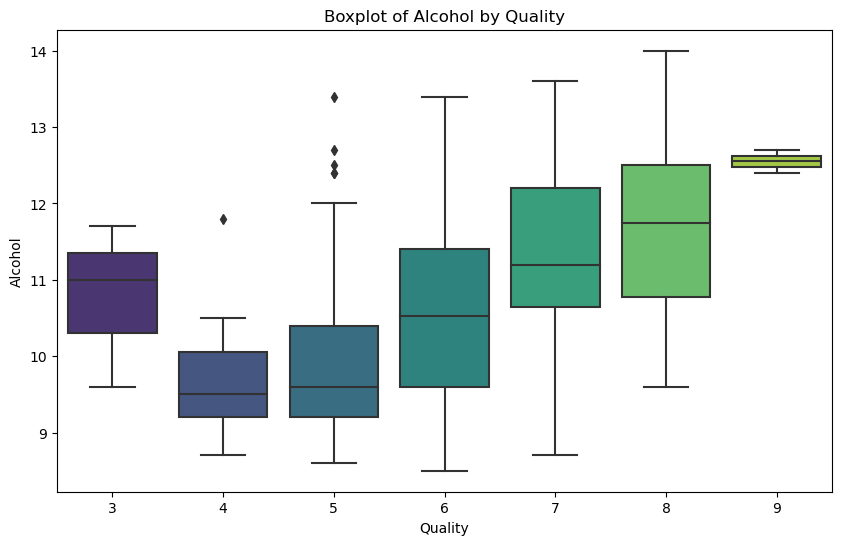

In [49]:
# Create a side-by-side boxplot for 'alcohol' grouped by 'quality'
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df, palette='viridis')
plt.title('Boxplot of Alcohol by Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.grid(False)

# Show the plot
plt.show()


# Task 2: Classification

## Task 2.1 

In [50]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.4,0.200,0.38,11.8,0.055,51.0,170.0,1.00040,3.34,0.82,8.9,6
1,9.8,0.310,0.49,15.4,0.046,13.0,119.0,1.00040,3.18,0.45,9.5,5
2,7.8,0.250,0.41,3.7,0.042,37.0,149.0,0.99540,3.36,0.45,10.0,6
3,5.9,0.280,0.14,8.6,0.032,30.0,142.0,0.99542,3.28,0.44,9.5,6
4,6.3,0.320,0.26,12.3,0.044,24.0,205.0,0.99611,3.11,0.58,9.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
595,8.4,0.240,0.49,7.4,0.039,46.0,108.0,0.99340,3.03,0.33,11.9,7
596,7.9,0.255,0.26,2.0,0.026,40.0,190.0,0.99320,3.04,0.39,11.2,6
597,6.4,0.180,0.32,9.6,0.052,24.0,90.0,0.99630,3.35,0.49,9.4,6
598,6.9,0.200,0.50,10.0,0.036,78.0,167.0,0.99640,3.15,0.55,10.2,6


In [51]:
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the features (independent variables) and the target (dependent variable)
features = df.drop(columns=['quality'])  
target = df['quality']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Choose the number of neighbors (you can adjust this value)
k = 5

# Create the k-NN classifier
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Predict wine quality on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model using multiple metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.4583
Precision: 0.4007
Recall: 0.4583
F1 Score: 0.4245
Confusion Matrix:
[[ 0  2  5  0  0]
 [ 0 18 14  3  0]
 [ 0 14 32  6  0]
 [ 0  2 13  5  0]
 [ 0  2  3  1  0]]


C:\Users\swaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.4,0.20,0.38,11.8,0.055,51.0,170.0,1.00040,3.34,0.82,8.9,6
1,9.8,0.31,0.49,15.4,0.046,13.0,119.0,1.00040,3.18,0.45,9.5,5
2,7.8,0.25,0.41,3.7,0.042,37.0,149.0,0.99540,3.36,0.45,10.0,6
3,5.9,0.28,0.14,8.6,0.032,30.0,142.0,0.99542,3.28,0.44,9.5,6
4,6.3,0.32,0.26,12.3,0.044,24.0,205.0,0.99611,3.11,0.58,9.9,5


## Task 2.2 

In [54]:
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Split the data into features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model using appropriate metrics 
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.4583


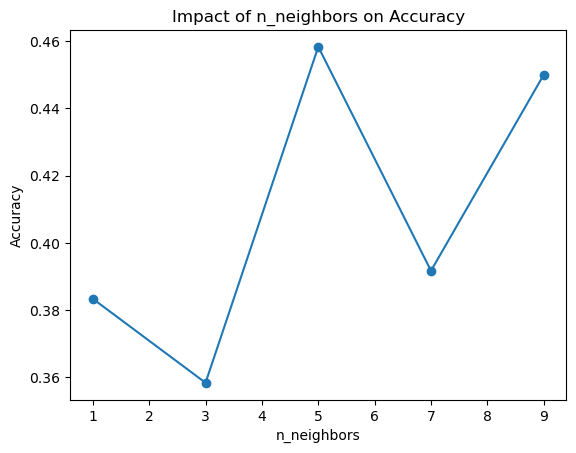

In [55]:
# Define a range of values for n_neighbors
n_neighbors_values = [1, 3, 5, 7, 9]

# Initialize lists to store results
accuracy_scores = []

# Iterate over n_neighbors values
for n_neighbors in n_neighbors_values:
    # Create and train the k-NN model
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)

    # Make predictions
    y_pred = knn_model.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results
plt.plot(n_neighbors_values, accuracy_scores, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Impact of n_neighbors on Accuracy')
plt.grid(False)
plt.show()


## Task 2.3 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the predefined train/test split ratios
splits = [(0.2, 0.8), (0.3, 0.7), (0.4, 0.6), (0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]

# Initialize a dictionary to store accuracy scores
accuracy_scores = {}

# Define your optimal k-NN model with the chosen hyperparameter(s)
optimal_knn_model = KNeighborsClassifier(n_neighbors=5)  

for split in splits:
    train_ratio, test_ratio = split
    
    # Split the data into training and test sets based on the split ratios
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X, y, test_size=test_ratio, random_state=42
    )
    
    # Train the model on the training data
    optimal_knn_model.fit(X_train_split, y_train_split)
    
    # Make predictions on the test data
    y_pred = optimal_knn_model.predict(X_test_split)
    
    # Calculate accuracy and store it in the dictionary
    accuracy = accuracy_score(y_test_split, y_pred)
    accuracy_scores[train_ratio] = accuracy

# Find the best train/test split ratio
best_split_ratio = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_split_ratio]

# Print the results
print("Accuracy scores for different train/test split ratios:")
for split_ratio, accuracy in accuracy_scores.items():
    split_ratio_display = int(split_ratio * 100)
    test_ratio_display = 100 - split_ratio_display  
    print(f"Split Ratio {split_ratio_display}:{test_ratio_display} - Accuracy: {accuracy:.4f}")

print(f"The best train/test split ratio is {int(best_split_ratio * 100)}:{int(round((1 - best_split_ratio) * 100))} with an accuracy of {best_accuracy:.4f}")


Accuracy scores for different train/test split ratios:
Split Ratio 20:80 - Accuracy: 0.4146
Split Ratio 30:70 - Accuracy: 0.4095
Split Ratio 40:60 - Accuracy: 0.4250
Split Ratio 50:50 - Accuracy: 0.4067
Split Ratio 60:40 - Accuracy: 0.3958
Split Ratio 70:30 - Accuracy: 0.3833
Split Ratio 80:20 - Accuracy: 0.4583
The best train/test split ratio is 80:20 with an accuracy of 0.4583


# Task 3: Clustering

## Task 3.1 

C:\Users\swaya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\swaya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\swaya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\swaya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

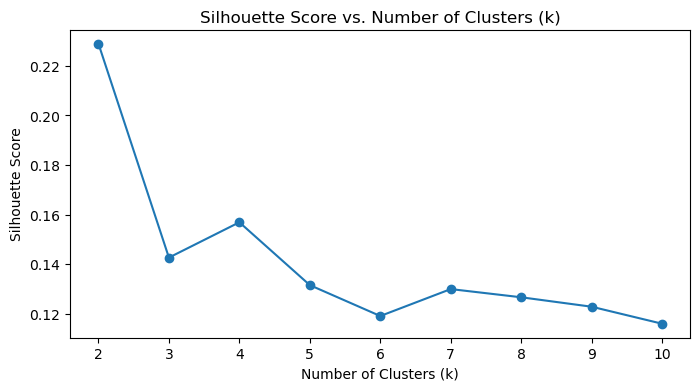

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


df = df.drop('quality', axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Initialize a list to store the silhouette scores
silhouette_scores = []

for k in range(2, 11):
    # Create a KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data
    kmeans.fit(scaled_data)
    
    # Predict the cluster labels
    labels = kmeans.labels_
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for different values of k
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(False)
plt.show()


## Task 3.2 

C:\Users\swaya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\swaya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\swaya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\swaya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0.5, 1.0, 'Elbow Method for Optimal k')

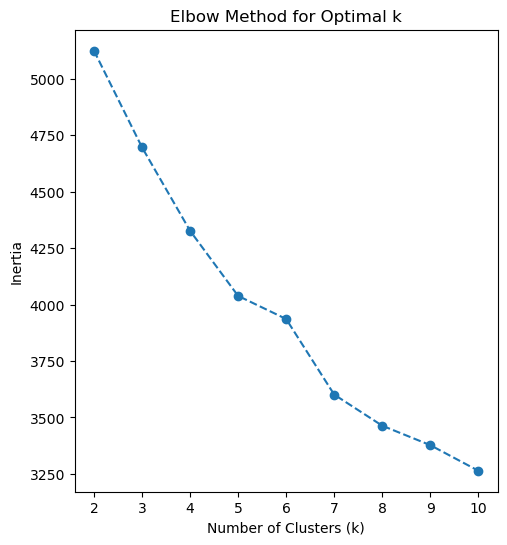

In [59]:

# Initialize the imputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on your data
df_imputed = imputer.fit_transform(df)

# Standardize the imputed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
possible_k_values = range(2, 11)  

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Append inertia and silhouette score for each k
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the Elbow Method graph to find the optimal k
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(possible_k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')





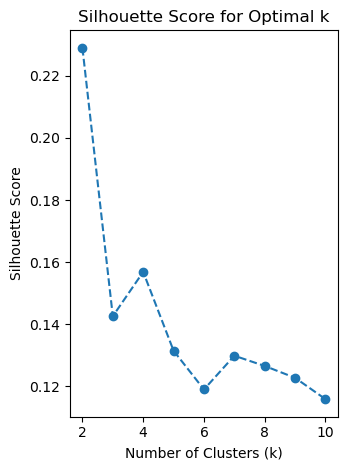

In [60]:
plt.subplot(1, 2, 2)
plt.plot(possible_k_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.tight_layout()
plt.show()

C:\Users\swaya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


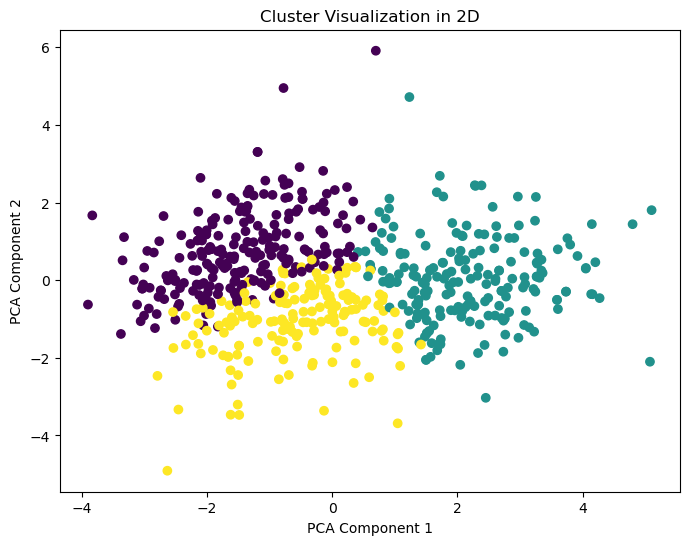

In [61]:
# Based on the Elbow Method or Silhouette Score, choose an optimal value of k

optimal_k = 3

# Build the k-means clustering model with the optimal k and set n_init explicitly
kmeans = KMeans(n_clusters=optimal_k, n_init=1, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to the data
df['cluster'] = kmeans.labels_

# Visualize the clusters 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Cluster Visualization in 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Task 3.3 

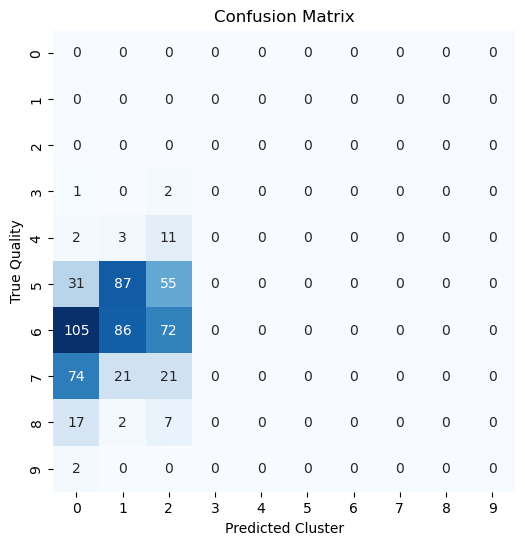

In [62]:
from sklearn.metrics import confusion_matrix


original_df = pd.read_csv('A2RandomSample.csv')

# Add the 'density' column back to your DataFrame
df['quality'] = original_df['quality']


# Create a confusion matrix
confusion = confusion_matrix(df['quality'], df['cluster'])

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.xlabel('Predicted Cluster')
plt.ylabel('True Quality')
plt.title('Confusion Matrix')
plt.show()
